<a href="https://colab.research.google.com/github/hypro2/hands-on-langchain/blob/main/langchain_tutorial_part_4_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q langchain
!pip install -q openai

In [26]:
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')

In [5]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

vsion_model = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024, openai_api_key=openai_api_key)

In [6]:
import base64

def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

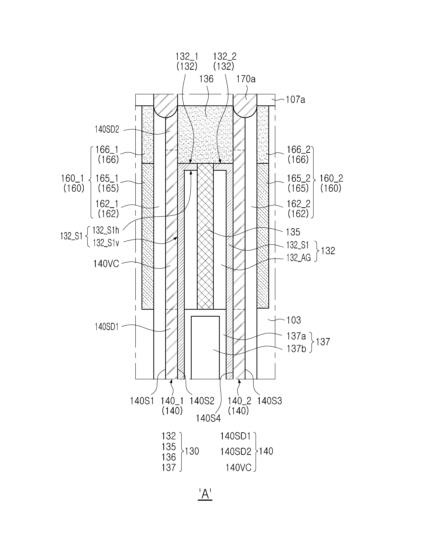

In [22]:
import PIL.Image

img = PIL.Image.open("/content/sdfsdfsdfdsf.jpg")
img

In [49]:
img_base64 = encode_image(r"/content/sdfsdfsdfdsf.jpg")

In [46]:
prompt ="""```This patent describes a semiconductor device having a white gate structure and vertical pattern for high integration and performance.
It includes a dielectric structure with air gaps to improve electrical properties and reduce controllability of the gate electrodes over the vertical channel region.
The device further features a back gate trench, a contact pattern, and an information storage structure for memory applications.
Said fabrication process includes forming said white gate structure, vertical pattern, and gate-dielectric layer, and creating contact holes and back gate trenches within said semiconductor substrate.
Overall, the patent details methods for designing and manufacturing semiconductor devices to achieve high integration and improved electrical characteristics.

FIG. 1 is a schematic plan view of a semiconductor device, according to exemplary embodiments.
103
Intermediate Insulation Layer
107a
Third Upper Insulation Layer
130
Back Gate Structure
132
Dielectric Structures
135
Back Gate Electrodes
137
First and Second Auxiliary Structures
137a
First Floor
137b
Second Floor
140
Vertical Pattern
140S1
1st Side
162
Gate Dielectric Layer
165
Gate Electrode
166
Gate Capping Layer
```

Let's work this out in a step by step way to be sure we have the right answer.
Describes the image."""

In [18]:
msg = vsion_model.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )

In [19]:
print(msg.content)

The provided text appears to be a description of a semiconductor device as detailed in a patent, and the image is likely a figure from that patent. The figure is a schematic representation of the semiconductor device, showing various layers and structures mentioned in the text. Let's match the key elements from the description to the elements in the image:

1. **Intermediate Insulation Layer (103)** - This layer is likely to be the foundation of the structure in the image, providing insulation between various components of the semiconductor device.

2. **Third Upper Insulation Layer (107a)** - This layer is depicted at the top of the structure, providing additional insulation.

3. **Back Gate Structure (130)** - The back gate structure is part of the lower section of the device, possibly shown at the bottom of the image.

4. **Dielectric Structures (132)** - These structures are dispersed throughout the device, possibly the areas labeled as 132. They are crucial for the device's electr

In [24]:
!pip install -U --quiet langchain-google-genai pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [34]:
from langchain_google_genai import ChatGoogleGenerativeAI

from google.colab import userdata
google_api_key = userdata.get('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision", max_tokens=1024, google_api_key=google_api_key)

In [47]:
import requests
from IPython.display import Image
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI



msg = llm.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64, {img_base64}"},
                    },
                ]
            )
        ]
    )

In [48]:
print(msg.content)

 The image shows a schematic plan view of a semiconductor device.
This includes a dielectric structure with air gaps to improve electrical properties and reduce controllability of the gate electrodes over the vertical channel region.
The device further features a back gate trench, a contact pattern, and an information storage structure for memory applications.
